In [34]:
import numpy as np
import matplotlib.pyplot as plt

### 3 Regularized Linear Regression

In [35]:
x = np.loadtxt('data3/ex3Linx.dat')  # 载入数据
y = np.loadtxt('data3/ex3Liny.dat')

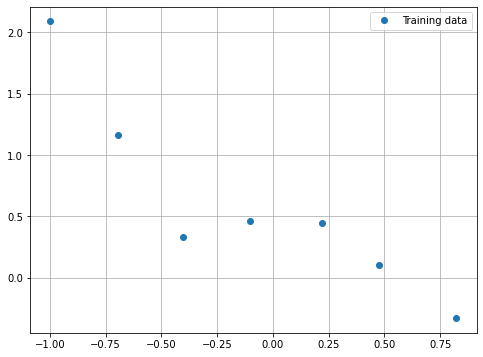

In [36]:
# 依据数据画出散点图
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Training data')
plt.grid()
plt.legend()
plt.show()

In [37]:
# 整理数据
m = y.shape[0]
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [38]:
def gen_x(num, X):
    m = X.shape[0]
    x0 = np.hstack((np.ones((m, 1)), X))
    for i in range(2, num+1):
        x0 = np.hstack((x0, X**i))
    return x0

In [39]:
x = gen_x(5, x)

假设函数：
$$
h_\theta(x)=\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3+\theta_4x^4+\theta_5x^5
$$

In [40]:
def h(theta, X):
    return np.dot(X, theta)

In [41]:
theta = np.zeros((6, 1))

代价函数：
$$
J(\theta)=\frac{1}{2m}[\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^{n}\theta_j^2]
$$

In [42]:
def J(theta, l, X, Y):
    term1 = np.dot((h(theta, X)-Y).T, h(theta, X)-Y)
    term2 = l*np.sum(theta[1:])
    return (1./2*m)*(term1 + term2)

Normal Equation:
$$
\theta=(X^TX+\lambda
\begin{bmatrix}
0 \\
& 1 \\ 
& \ & \ddots \\
& \ & \ & 1
\end{bmatrix}
)^{-1}X^T\vec{y}
$$

In [43]:
def gen_theta(l, X, Y):
    temp = np.eye(6) * l
    temp[0, 0] = 0
    return np.linalg.inv(X.T.dot(X) + temp).dot(X.T).dot(Y)

In [44]:
theta_0 = gen_theta(0, x, y)
theta_1 = gen_theta(1, x, y)
theta_2 = gen_theta(10, x, y)

In [45]:
x_space = np.linspace(-1, 1, 100)
x_space = gen_x(5, x_space.reshape(-1, 1))

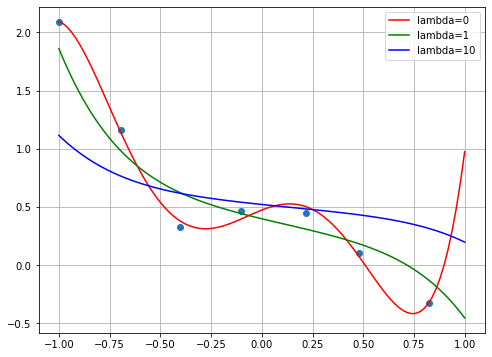

In [46]:
plt.figure(figsize=(8, 6))
plt.plot(x[:, 1], y, 'o')
plt.plot(x_space[:, 1], h(theta_0, x_space), 'r', label='lambda=0')
plt.plot(x_space[:, 1], h(theta_1, x_space), 'g', label='lambda=1')
plt.plot(x_space[:, 1], h(theta_2, x_space), 'b', label='lambda=10')
plt.grid()
plt.legend()
plt.show()

### 4 Regularized Logistic Regression

In [47]:
x = np.loadtxt('data3/ex3Logx.dat', delimiter=',')  # 载入数据
y = np.loadtxt('data3/ex3Logy.dat', delimiter=',')

In [48]:
# 整理数据
m = y.shape[0]
y = y.reshape(-1, 1)

In [49]:
pos = [i for i in range(y.shape[0]) if y[i] == 1]
neg = [i for i in range(y.shape[0]) if y[i] == 0]

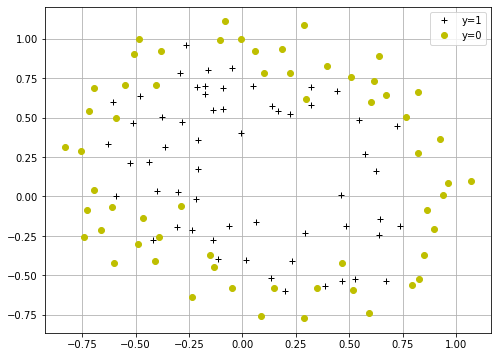

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(x[pos, 0], x[pos, 1], 'k+', label='y=1')
plt.plot(x[neg, 0], x[neg, 1], 'yo', label='y=0')
plt.grid()
plt.legend()
plt.show()

$$
x=
\begin{bmatrix}
1 \\
u \\ 
v \\
u^2 \\
uv \\
v^2 \\
u^3 \\
\vdots \\
uv^5 \\
v^6
\end{bmatrix}
$$

In [51]:
def gen_x2(num, X):
    x0 = np.hstack((np.ones((X.shape[0], 1)), X))
    for i in range(2, num+1):
        for j in range(0, i+1):
            x0 = np.hstack((x0, ((X[:, 0]**(i-j))*(X[:, 1]**j)).reshape(-1, 1)))
    return x0

In [52]:
x2 = gen_x2(6, x)

In [53]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

In [54]:
def h2(theta, x):
    return sigmoid(np.dot(x, theta))

In [55]:
def L(theta, x, y):
    return (1./x.shape[0]) * (np.dot(-y.T, np.log(h2(theta, x))) - np.dot((1-y.T), np.log(1-h2(theta, x))))

Regularized Logistic Regression:
$$
J(\theta)=-\frac{1}{m}\sum^{m}_{i=1}[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)}))]+\frac{\lambda}{2m}\sum^{n}_{j=1}\theta_j^2
$$

Newton's Method:
$$
\theta^{(t+1)}=\theta^{(t)}-H^{-1}\nabla_\theta J
$$

The gradient $\nabla_\theta (J)$:
$$
\nabla_\theta J = 
\begin{bmatrix}
\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x_0^{(i)} \\
\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x_1^{(i)}+\frac{\lambda}{m}\theta_1 \\
\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x_2^{(i)}+\frac{\lambda}{m}\theta_2 \\
\vdots \\
\frac{1}{m}\sum^{m}_{i=1}(h_\theta(x^{(i)})-y^{(i)})x_n^{(i)}+\frac{\lambda}{m}\theta_n \\
\end{bmatrix}
$$

Hessian:
$$
H=\frac{1}{m}[\sum^{m}_{i=1}h_\theta(x^{(i)})(1-h_\theta(x^{(i)}))x^{(i)}(x^{(i)})^T]+\frac{\lambda}{m}
\begin{bmatrix}
0 \\
& 1 \\ 
& \ & \ddots \\
& \ & \ & 1
\end{bmatrix}
$$

In [56]:
def func(l, theta, x, y):
    temp = []
    temp.append(((h2(theta, x2)-y) * x2[:, 0].reshape(-1, 1)).sum())
    for i in range(1, x.shape[1]):
        temp.append(((h2(theta, x2)-y) * x2[:, i].reshape(-1, 1)).sum() + l*theta[i][0])
    return (1./x.shape[0]) * np.array(temp).reshape(-1, 1)

In [57]:
def H(l, theta, x):
    term1 = (x.T).dot(np.diag(h2(theta, x).reshape(-1))).dot(np.diag(1-h2(theta, x).reshape(-1))).dot(x)
    term2 = np.eye(x.shape[1]) * l
    term2[0, 0] = 0
    return (1./x.shape[0]) * (term1 + term2)

In [58]:
def newton_method(l, theta, X, Y):
    theta_record = []   # 记录theta
    L_record = []       # 记录损失
    temp = L(theta, X, Y)
    iterations = 0
    while True:
        theta_record.append(theta.tolist())
        # print(theta_record)
        theta = theta - np.linalg.inv(H(l, theta, X)).dot(func(l, theta, X, Y))
        cost = L(theta, X, Y)
        # print(cost)
        L_record.append(cost.tolist())
        iterations += 1
        if abs(temp - cost) < 1e-9:
            break
        temp = cost
    theta_record = np.array(theta_record).reshape(-1, len(theta))
    L_record = np.array(L_record).reshape(-1)
    return theta, theta_record, L_record, iterations

In [59]:
theta = np.zeros((x2.shape[1], 1))
theta_1, theta_record_1, L_record_1, iterations_1 = newton_method(0, theta, x2, y)
theta_2, theta_record_2, L_record_2, iterations_2 = newton_method(1, theta, x2, y)
theta_3, theta_record_3, L_record_3, iterations_3 = newton_method(10, theta, x2, y)

In [60]:
def plotData(l, theta):
    u = np.linspace(-1, 1.5, 200)
    v = np.linspace(-1, 1.5, 200)
    z = np.zeros((len(u), len(v)))

    for i in range(len(u)):
        for j in range(len(v)):
            z[i][j] = h2(theta, gen_x2(6, np.array((u[i], v[j])).reshape(1, -1)))

    plt.figure(figsize=(8, 6))
    plt.plot(x[pos, 0], x[pos, 1], 'k+', label='y=1')
    plt.plot(x[neg, 0], x[neg, 1], 'yo', label='y=0')
    contour = plt.contour(u, v, z, [0.5])
    plt.clabel(contour, inline=1, fontsize=15, fmt='Lambda = {0}'.format(l))
    plt.grid()
    plt.legend()
    plt.show()

C:\Users\A1029\AppData\Local\Temp/ipykernel_8772/2718318342.py:2: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-z))


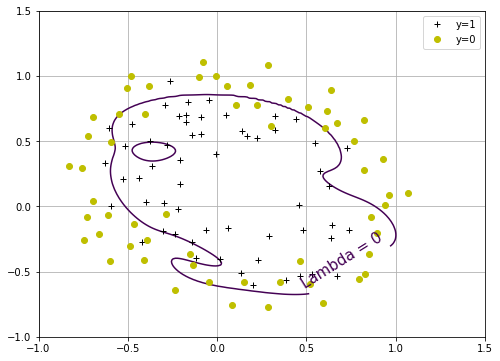

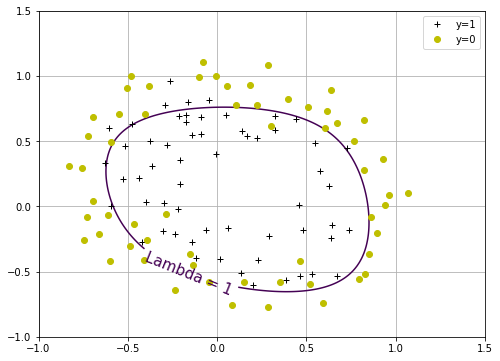

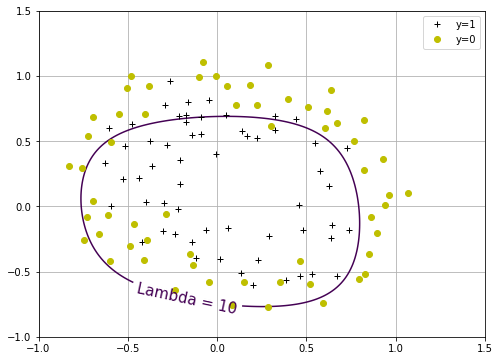

In [61]:
plotData(0, theta_1)
plotData(1, theta_2)
plotData(10, theta_3)

In [62]:
norm_1 = np.linalg.norm(theta_1)
norm_2 = np.linalg.norm(theta_2)
norm_3 = np.linalg.norm(theta_3)

In [63]:
print(norm_1, norm_2, norm_3)

7172.694617802267 4.240009281990332 0.9384184573785728
